<a href="https://colab.research.google.com/github/erkulev/erk/blob/main/%D0%9F%D0%BE%D0%B3%D0%BE%D0%B4%D0%B0_%D0%B2_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Скачиваем файл архива погоды с 01.01.2015 по 28.04.2021 pogoda.xls https://rp5.ru/Архив погоды в Москвк-Вднх


In [ ]:
!wget -O "weather.xls.gz" "http://37.9.3.250/download/files.synop/27/27612.01.01.2015.01.01.2021.1.0.0.ru.utf8.00000000.xls.gz"


--2021-04-29 04:37:06--  http://37.9.3.250/download/files.synop/27/27612.01.01.2015.01.01.2021.1.0.0.ru.utf8.00000000.xls.gz
Connecting to 37.9.3.250:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1663119 (1.6M) [application/octet-stream]
Saving to: ‘weather.xls.gz’

weather.xls.gz      100%[===================>]   1.59M   767KB/s    in 2.1s    

2021-04-29 04:37:09 (767 KB/s) - ‘weather.xls.gz’ saved [1663119/1663119]



In [ ]:
!gzip -df "weather.xls.gz"

In [ ]:
import pandas as pd
data=pd.read_excel("/content/weather.xls",skiprows=6) #читаем данные файла отбросив первые 6 строк коментариев

In [ ]:
data.head(10)

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,28.04.2021 06:00,1.7,743.7,758.4,1.1,85.0,"Ветер, дующий с запада",1,NaN,NaN,Облаков нет.,,NaN,NaN,1.6,NaN,NaN,NaN,NaN,NaN,NaN,10.0,-0.6,4,12.0,NaN,NaN,NaN,NaN
1,28.04.2021 03:00,3.3,742.6,757.3,1.3,80.0,"Ветер, дующий с западо-северо-запада",1,NaN,NaN,100%.,Состояние неба в общем не изменилось.,Дождь.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN
2,28.04.2021 00:00,3.2,741.3,755.9,0.2,91.0,"Ветер, дующий с запада",1,NaN,NaN,100%.,Дождь (незамерзающий) неливневый.,Дождь.,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,600-1000,NaN,NaN,NaN,1.8,NaN,NaN,NaN,NaN,NaN,NaN
3,27.04.2021 21:00,2.6,741.1,755.8,0.3,95.0,"Штиль, безветрие",0,NaN,NaN,100%.,Дождь незамерзающий непрерывный слабый в срок ...,Дождь.,Облака покрывали более половины неба в течение...,NaN,3.2,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,Высокослоистые непросвечивающие или слоисто-до...,NaN,NaN,1.8,10,12.0,NaN,NaN,NaN,NaN
4,27.04.2021 18:00,2.7,740.8,755.5,-0.1,93.0,"Ветер, дующий с западо-северо-запада",1,NaN,NaN,100%.,Дождь незамерзающий непрерывный слабый в срок ...,Дождь.,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,Высокослоистые непросвечивающие или слоисто-до...,NaN,4.0,1.7,7,12.0,NaN,NaN,NaN,NaN
5,27.04.2021 15:00,2.9,740.9,755.5,-0.2,91.0,"Ветер, дующий с северо-запада",2,NaN,NaN,100%.,Дождь незамерзающий непрерывный слабый в срок ...,Снег или дождь со снегом.,Дождь.,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,200-300,Высокослоистые непросвечивающие или слоисто-до...,NaN,4.0,1.5,NaN,NaN,NaN,NaN,NaN,NaN
6,27.04.2021 12:00,1.8,741.1,755.8,-0.4,95.0,"Ветер, дующий с северо-запада",1,NaN,NaN,100%.,Дождь незамерзающий непрерывный слабый в срок ...,Снег или дождь со снегом.,Дождь.,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,200-300,Высокослоистые непросвечивающие или слоисто-до...,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,27.04.2021 09:00,3.0,741.5,756.1,-0.6,82.0,"Ветер, дующий с северо-северо-востока",2,NaN,NaN,100%.,Дождь незамерзающий непрерывный слабый в срок ...,Дождь.,Облака покрывали более половины неба в течение...,2.8,NaN,Слоистые разорванные или кучевые разорванные о...,50%.,300-600,Высокослоистые непросвечивающие или слоисто-до...,NaN,10.0,0.2,0.6,12.0,Поверхность почвы сырая (вода застаивается на ...,4.0,NaN,NaN
8,27.04.2021 06:00,3.9,742.1,756.7,-0.4,76.0,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,100%.,Дождь незамерзающий с перерывами слабый в срок...,Дождь.,Облака покрывали более половины неба в течение...,2.8,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",40%.,600-1000,"Высококучевые, просвечивающие или плотные в дв...",NaN,10.0,0.0,Следы осадков,12.0,NaN,NaN,NaN,NaN
9,27.04.2021 03:00,3.0,742.5,757.0,-1.1,73.0,"Штиль, безветрие",0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...",Перистые (часто в виде полос) и перисто-слоист...,NaN,-1.4,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info() #none.NaN,Na,null имена "пустого значеня"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21506 entries, 0 to 21505
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Местное время в Москве (ВДНХ)  21506 non-null  object 
 1   T                              21505 non-null  float64
 2   Po                             21490 non-null  float64
 3   P                              21490 non-null  float64
 4   Pa                             21283 non-null  float64
 5   U                              21489 non-null  float64
 6   DD                             21506 non-null  object 
 7   Ff                             21506 non-null  int64  
 8   ff10                           113 non-null    float64
 9   ff3                            815 non-null    float64
 10  N                              20297 non-null  object 
 11  WW                             21506 non-null  object 
 12  W1                             9484 non-null  

In [ ]:
data.describe()

,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,VV,Td,tR,Tg
count,21505.000000,21490.000000,21490.000000,21283.000000,21489.000000,21506.000000,113.00000,815.000000,4613.000000,2306.000000,11875.000000,21490.000000,9199.000000,1258.000000
mean,6.640456,747.330344,761.846859,0.000954,73.343757,1.158421,11.00000,11.366871,3.458725,10.111578,8.340640,1.440596,12.001304,9.436407
std,10.169924,7.660311,7.892234,0.917996,19.413206,0.919581,1.36277,1.571907,8.878129,11.324137,2.819127,8.777069,0.125115,5.553917
min,-29.900000,718.200000,732.400000,-8.000000,12.000000,0.000000,10.00000,10.000000,-29.900000,-25.000000,0.200000,-33.300000,12.000000,-4.000000
25%,-0.500000,742.600000,756.900000,-0.500000,61.000000,1.000000,10.00000,10.000000,-2.200000,1.200000,4.000000,-4.400000,12.000000,5.000000
50%,5.500000,747.300000,761.600000,0.000000,79.000000,1.000000,11.00000,11.000000,2.700000,9.000000,10.000000,0.600000,12.000000,10.000000
75%,14.900000,752.000000,766.600000,0.500000,89.000000,2.000000,11.00000,12.000000,10.800000,20.600000,10.000000,8.700000,12.000000,14.000000
max,33.400000,774.100000,789.100000,9.900000,100.000000,7.000000,18.00000,21.000000,21.900000,33.600000,50.000000,21.200000,24.000000,20.000000


In [ ]:
data.columns

Index(['Местное время в Москве (ВДНХ)', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff',
       'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm',
       'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')

In [ ]:
data["T"]

0        1.7
1        3.3
2        3.2
3        2.6
4        2.7
        ... 
21501   -5.1
21502   -5.5
21503   -5.9
21504   -6.2
21505   -6.6
Name: T, Length: 21506, dtype: float64

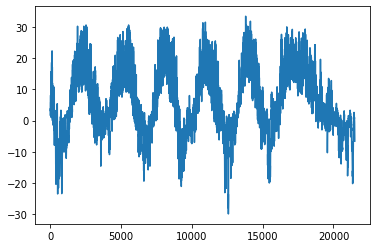

In [ ]:
data["T"].plot()


In [ ]:
data["dates"]=pd.to_datetime(data['Местное время в Москве (ВДНХ)'],dayfirst=True) #добавляем колонку с датой требуемо Pandos
data.head(10)

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,dates
0,28.04.2021 06:00,1.7,743.7,758.4,1.1,85.0,"Ветер, дующий с запада",1,NaN,NaN,Облаков нет.,,NaN,NaN,1.6,NaN,NaN,NaN,NaN,NaN,NaN,10.0,-0.6,4,12.0,NaN,NaN,NaN,NaN,2021-04-28 06:00:00
1,28.04.2021 03:00,3.3,742.6,757.3,1.3,80.0,"Ветер, дующий с западо-северо-запада",1,NaN,NaN,100%.,Состояние неба в общем не изменилось.,Дождь.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-28 03:00:00
2,28.04.2021 00:00,3.2,741.3,755.9,0.2,91.0,"Ветер, дующий с запада",1,NaN,NaN,100%.,Дождь (незамерзающий) неливневый.,Дождь.,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,600-1000,NaN,NaN,NaN,1.8,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-28 00:00:00
3,27.04.2021 21:00,2.6,741.1,755.8,0.3,95.0,"Штиль, безветрие",0,NaN,NaN,100%.,Дождь незамерзающий непрерывный слабый в срок ...,Дождь.,Облака покрывали более половины неба в течение...,NaN,3.2,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,Высокослоистые непросвечивающие или слоисто-до...,NaN,NaN,1.8,10,12.0,NaN,NaN,NaN,NaN,2021-04-27 21:00:00
4,27.04.2021 18:00,2.7,740.8,755.5,-0.1,93.0,"Ветер, дующий с западо-северо-запада",1,NaN,NaN,100%.,Дождь незамерзающий непрерывный слабый в срок ...,Дождь.,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,Высокослоистые непросвечивающие или слоисто-до...,NaN,4.0,1.7,7,12.0,NaN,NaN,NaN,NaN,2021-04-27 18:00:00
5,27.04.2021 15:00,2.9,740.9,755.5,-0.2,91.0,"Ветер, дующий с северо-запада",2,NaN,NaN,100%.,Дождь незамерзающий непрерывный слабый в срок ...,Снег или дождь со снегом.,Дождь.,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,200-300,Высокослоистые непросвечивающие или слоисто-до...,NaN,4.0,1.5,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-27 15:00:00
6,27.04.2021 12:00,1.8,741.1,755.8,-0.4,95.0,"Ветер, дующий с северо-запада",1,NaN,NaN,100%.,Дождь незамерзающий непрерывный слабый в срок ...,Снег или дождь со снегом.,Дождь.,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,200-300,Высокослоистые непросвечивающие или слоисто-до...,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-27 12:00:00
7,27.04.2021 09:00,3.0,741.5,756.1,-0.6,82.0,"Ветер, дующий с северо-северо-востока",2,NaN,NaN,100%.,Дождь незамерзающий непрерывный слабый в срок ...,Дождь.,Облака покрывали более половины неба в течение...,2.8,NaN,Слоистые разорванные или кучевые разорванные о...,50%.,300-600,Высокослоистые непросвечивающие или слоисто-до...,NaN,10.0,0.2,0.6,12.0,Поверхность почвы сырая (вода застаивается на ...,4.0,NaN,NaN,2021-04-27 09:00:00
8,27.04.2021 06:00,3.9,742.1,756.7,-0.4,76.0,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,100%.,Дождь незамерзающий с перерывами слабый в срок...,Дождь.,Облака покрывали более половины неба в течение...,2.8,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",40%.,600-1000,"Высококучевые, просвечивающие или плотные в дв...",NaN,10.0,0.0,Следы осадков,12.0,NaN,NaN,NaN,NaN,2021-04-27 06:00:00
9,27.04.2021 03:00,3.0,742.5,757.0,-1.1,73.0,"Штиль, безветрие",0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...",Перистые (часто в виде полос) и перисто-слоист...,NaN,-1.4,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-27 03:00:00


In [ ]:
day_end

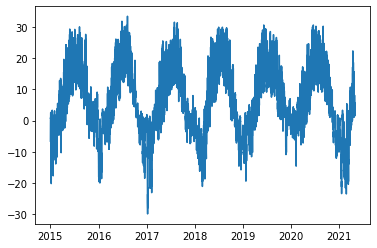

In [ ]:
import matplotlib.pyplot as plt
x=data['dates']
y=data['T']
plt.plot(x,y         )

In [ ]:
day_end=pd.Timestamp(year=2017,month=3,day=1) #фильтруем данные
condition=data['dates']<day_end
data[condition]

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,dates
12154,28.02.2017 21:00,3.0,747.4,762.1,-0.6,74.0,"Ветер, дующий с юга",2,NaN,NaN,100%.,,NaN,NaN,NaN,4.6,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,-1.3,Осадков нет,12.0,NaN,NaN,NaN,NaN,2017-02-28 21:00:00
12155,28.02.2017 18:00,3.6,748.0,762.7,-0.9,64.0,"Ветер, дующий с юго-юго-востока",2,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-2.7,Осадков нет,12.0,NaN,NaN,NaN,NaN,2017-02-28 18:00:00
12156,28.02.2017 15:00,4.2,748.9,763.5,-0.6,59.0,"Ветер, дующий с юго-юго-востока",2,NaN,NaN,70 – 80%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",40%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,-3.3,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-28 15:00:00
12157,28.02.2017 12:00,2.4,749.5,764.2,0.7,61.0,"Ветер, дующий с юга",1,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-4.4,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-28 12:00:00
12158,28.02.2017 09:00,0.0,748.8,763.7,0.8,78.0,"Штиль, безветрие",0,NaN,NaN,"90 или более, но не 100%",,NaN,NaN,-1.5,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.","90 или более, но не 100%",1000-1500,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-3.4,Осадков нет,12.0,NaN,NaN,Ровный слой слежавшегося или мокрого снега пок...,24,2017-02-28 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21501,01.01.2015 04:00,-5.1,742.7,757.8,-0.2,94.0,"Ветер, дующий с запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.9,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 04:00:00
21502,01.01.2015 03:00,-5.5,742.7,757.8,-0.5,92.0,"Ветер, дующий с запада",2,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения. Ди...,Снег или дождь со снегом.,Морось.,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,-6.6,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 03:00:00
21503,01.01.2015 02:00,-5.9,742.9,758.0,-0.5,93.0,"Ветер, дующий с запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.9,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 02:00:00
21504,01.01.2015 01:00,-6.2,742.9,758.0,-0.7,92.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.3,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 01:00:00


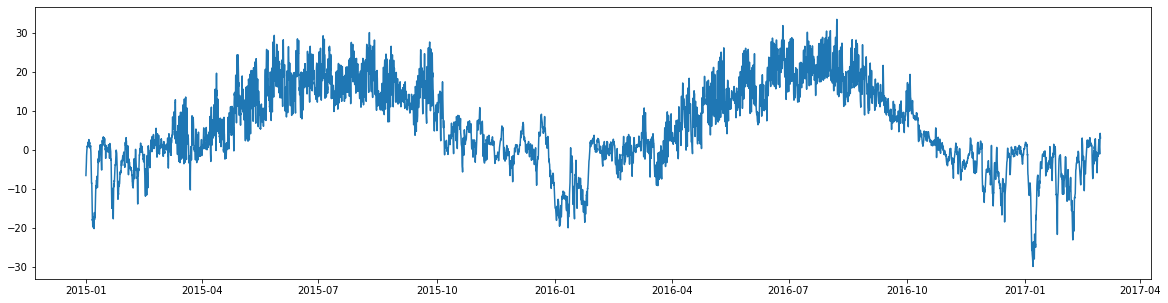

In [ ]:
data_short=data[condition]
plt.figure(figsize=[20,5])
x=data_short['dates']
y=data_short['T']
plt.plot(x,y) 

In [ ]:
data['T'].isna()#список пустых значений

0        False
1        False
2        False
3        False
4        False
         ...  
21501    False
21502    False
21503    False
21504    False
21505    False
Name: T, Length: 21506, dtype: bool

In [ ]:
condition=data['T'].isna()
data[condition]

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,dates
2327,11.07.2020 09:00,NaN,746.1,760.8,-4.8,NaN,"Ветер, дующий с северо-запада",2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.4,Осадков нет,12.0,NaN,NaN,NaN,NaN,2020-07-11 09:00:00


In [ ]:
condition=data['T'].notna()
data2=data[condition]

In [ ]:
data['date']=data['dates']
data=data.sort_values('date')
data=data.reset_index(drop=True)
data.head(5)

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,dates,date
0,01.01.2015 00:00,-6.6,743.2,758.4,-0.7,93.0,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,100%.,Морось (незамерзающая) или снежные зерна нелив...,Снег или дождь со снегом.,Морось.,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,300-600,NaN,NaN,NaN,-7.5,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:00:00,2015-01-01 00:00:00
1,01.01.2015 01:00,-6.2,742.9,758.0,-0.7,92.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.3,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 01:00:00,2015-01-01 01:00:00
2,01.01.2015 02:00,-5.9,742.9,758.0,-0.5,93.0,"Ветер, дующий с запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.9,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 02:00:00,2015-01-01 02:00:00
3,01.01.2015 03:00,-5.5,742.7,757.8,-0.5,92.0,"Ветер, дующий с запада",2,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения. Ди...,Снег или дождь со снегом.,Морось.,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,-6.6,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 03:00:00,2015-01-01 03:00:00
4,01.01.2015 04:00,-5.1,742.7,757.8,-0.2,94.0,"Ветер, дующий с запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.9,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 04:00:00,2015-01-01 04:00:00


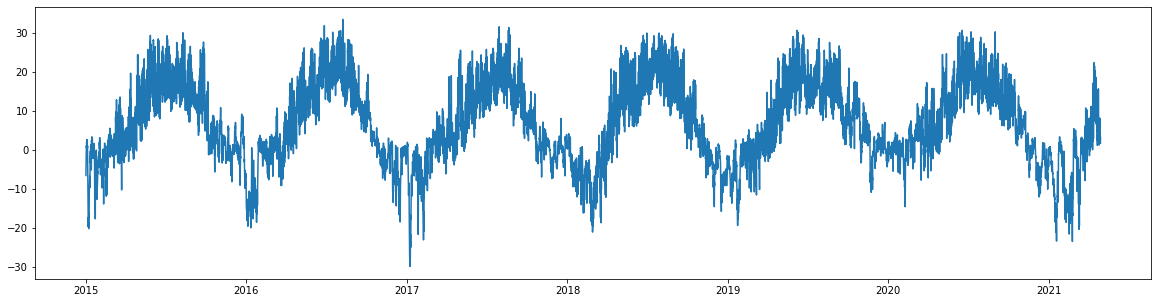

In [ ]:
plt.figure(figsize=[20,5])
x=data['date']
y=data['T']
plt.plot(x,y) 

In [ ]:
data['T'].min(),data['T'].max(),data['T'].mean()

(-29.9, 33.4, 6.640455707974926)

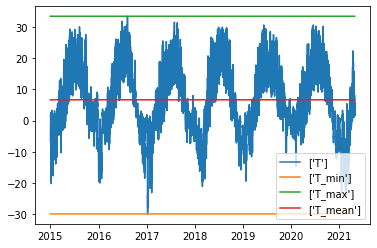

In [ ]:
data['T_min']= data['T'].min()
data['T_max']=data['T'].max()
data['T_mea']=data['T'].mean()
plt.plot(x,data['T'],label=['T'])
plt.plot(x,data['T_min'],label=['T_min'])
plt.plot(x,data['T_max'],label=['T_max'])
plt.plot(x,data['T_mea'],label=['T_mean'])
plt.legend()


In [ ]:
#Скользяшее среднее для усредненых значений в указанном окне(3) для исключения аноиалий и шума
data['T'].rolling(3).mean()

0             NaN
1             NaN
2       -6.233333
3       -5.866667
4       -5.500000
           ...   
21501    2.466667
21502    2.733333
21503    2.833333
21504    3.033333
21505    2.733333
Name: T, Length: 21506, dtype: float64

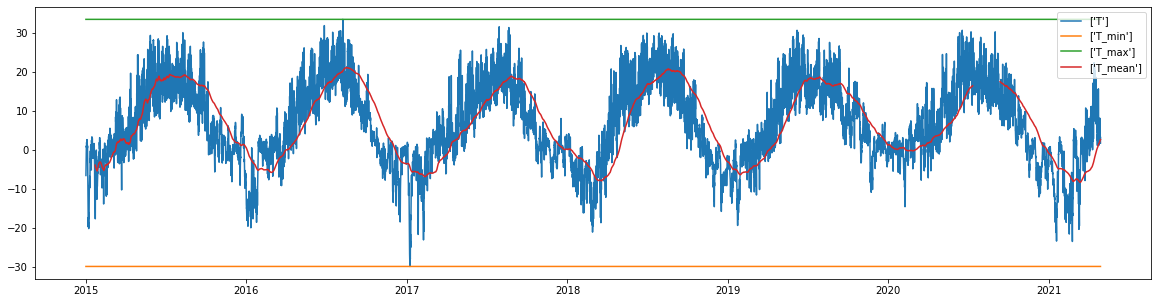

In [ ]:
plt.figure(figsize=[20,5])
plt.plot(x,data['T'],label=['T'])
plt.plot(x,data['T_min'],label=['T_min'])
plt.plot(x,data['T_max'],label=['T_max'])
plt.plot(x,data['T'].rolling(500).mean(),label=['T_mean'])
plt.legend()

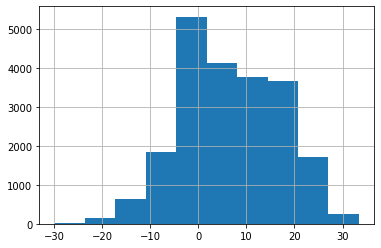

In [ ]:
#гистограма показывает сколько раз встречалось значение
data['T'].hist()

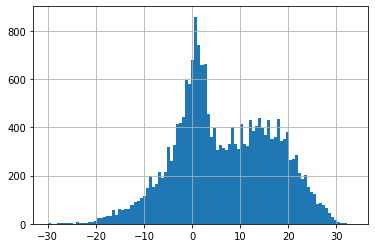

In [ ]:
data['T'].hist(bins=100)

In [ ]:
#вероятность значений
#квантиль 95%  равен 23 градусам - температура  не превышала  23 градусов в 95% СЛУЧАЕВ
data['T'].quantile(0.95)

23.1

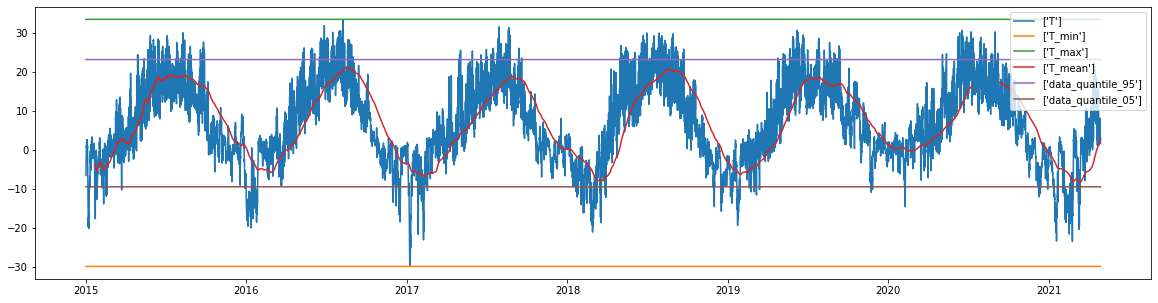

In [ ]:
data['data_quantile_95']= data['T'].quantile(0.95)
data['data_quantile_05']= data['T'].quantile(0.05)
plt.figure(figsize=[20,5])
plt.plot(x,data['T'],label=['T'])
plt.plot(x,data['T_min'],label=['T_min'])
plt.plot(x,data['T_max'],label=['T_max'])
plt.plot(x,data['T'].rolling(500).mean(),label=['T_mean'])
plt.plot(x,data['data_quantile_95'],label=['data_quantile_95'])
plt.plot(x,data['data_quantile_05'],label=['data_quantile_05'])
plt.legend()

In [ ]:
#Корреляция -функция которая показывает насуолько совпадают два ряда данных 1 -полностью совпадают  -1 в противофазе
#Корреляция определяет с помощью каких параетров можно делать прогноз
data.corr()

,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,VV,Td,tR,Tg,T_min,T_max,T_mea,data_quantile_95,data_quantile_05
T,1.000000e+00,-9.861022e-02,-1.679415e-01,-7.910953e-02,-4.411239e-01,-8.553226e-02,0.087068,-3.284813e-02,9.682937e-01,9.803305e-01,2.820155e-01,8.780799e-01,7.520872e-03,8.514355e-01,-5.670399e-15,2.856700e-14,3.135702e-15,-1.880911e-15,NaN
Po,-9.861022e-02,1.000000e+00,9.974760e-01,5.858170e-02,-1.879082e-01,-1.101578e-01,-0.069688,-1.847763e-02,-1.445813e-01,-7.970595e-02,2.173581e-01,-2.033940e-01,-1.532870e-02,-1.520308e-01,1.167432e-13,-1.195980e-13,-1.183108e-13,1.196869e-13,NaN
P,-1.679415e-01,9.974760e-01,1.000000e+00,6.231570e-02,-1.570526e-01,-1.024612e-01,-0.074085,-1.644043e-02,-2.108804e-01,-1.487676e-01,1.962398e-01,-2.642470e-01,-1.571394e-02,-1.964162e-01,2.481639e-13,-2.442771e-13,-2.443210e-13,2.467413e-13,NaN
Pa,-7.910953e-02,5.858170e-02,6.231570e-02,1.000000e+00,8.886701e-02,5.081818e-02,0.076169,2.124521e-01,2.263404e-02,7.262781e-02,1.429258e-03,-2.344883e-02,-3.007705e-02,-5.021414e-02,3.422483e-17,-2.187685e-17,1.661192e-17,1.997937e-17,NaN
U,-4.411239e-01,-1.879082e-01,-1.570526e-01,8.886701e-02,1.000000e+00,-2.264857e-01,0.025507,-6.082201e-02,-1.848866e-01,-3.519480e-01,-6.542269e-01,3.183905e-02,1.208610e-02,1.750335e-02,6.727700e-15,8.861089e-15,-1.089478e-14,1.107645e-15,NaN
Ff,-8.553226e-02,-1.101578e-01,-1.024612e-01,5.081818e-02,-2.264857e-01,1.000000e+00,0.405275,3.318041e-01,-1.014396e-01,-3.471359e-01,1.288388e-01,-2.143396e-01,-8.730100e-04,-1.101257e-01,1.846695e-14,-1.449147e-14,3.424320e-15,-3.835144e-14,NaN
ff10,8.706806e-02,-6.968773e-02,-7.408489e-02,7.616874e-02,2.550691e-02,4.052748e-01,1.000000,5.277546e-01,3.023276e-01,1.253603e-01,-2.319547e-01,1.097101e-01,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
ff3,-3.284813e-02,-1.847763e-02,-1.644043e-02,2.124521e-01,-6.082201e-02,3.318041e-01,0.527755,1.000000e+00,-1.435155e-01,3.506702e-02,-2.359270e-03,-6.209039e-02,NaN,-2.294874e-01,8.698244e-16,-9.488200e-16,-9.415025e-16,-8.413401e-16,NaN
Tn,9.682937e-01,-1.445813e-01,-2.108804e-01,2.263404e-02,-1.848866e-01,-1.014396e-01,0.302328,-1.435155e-01,1.000000e+00,NaN,1.049218e-01,9.647127e-01,NaN,9.662883e-01,4.836451e-17,-2.285385e-16,3.710619e-16,-1.262961e-16,NaN
Tx,9.803305e-01,-7.970595e-02,-1.487676e-01,7.262781e-02,-3.519480e-01,-3.471359e-01,0.125360,3.506702e-02,NaN,1.000000e+00,1.330896e-01,8.943868e-01,NaN,NaN,-3.163229e-16,6.307245e-16,1.028659e-15,-3.623224e-16,NaN


In [ ]:
data.corr().round(2) #округлим до 3 знаков

,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,VV,Td,tR,Tg,T_min,T_max,T_mea,data_quantile_95,data_quantile_05
T,1.00,-0.10,-0.17,-0.08,-0.44,-0.09,0.09,-0.03,0.97,0.98,0.28,0.88,0.01,0.85,-0.0,0.0,0.0,-0.0,NaN
Po,-0.10,1.00,1.00,0.06,-0.19,-0.11,-0.07,-0.02,-0.14,-0.08,0.22,-0.20,-0.02,-0.15,0.0,-0.0,-0.0,0.0,NaN
P,-0.17,1.00,1.00,0.06,-0.16,-0.10,-0.07,-0.02,-0.21,-0.15,0.20,-0.26,-0.02,-0.20,0.0,-0.0,-0.0,0.0,NaN
Pa,-0.08,0.06,0.06,1.00,0.09,0.05,0.08,0.21,0.02,0.07,0.00,-0.02,-0.03,-0.05,0.0,-0.0,0.0,0.0,NaN
U,-0.44,-0.19,-0.16,0.09,1.00,-0.23,0.03,-0.06,-0.18,-0.35,-0.65,0.03,0.01,0.02,0.0,0.0,-0.0,0.0,NaN
Ff,-0.09,-0.11,-0.10,0.05,-0.23,1.00,0.41,0.33,-0.10,-0.35,0.13,-0.21,-0.00,-0.11,0.0,-0.0,0.0,-0.0,NaN
ff10,0.09,-0.07,-0.07,0.08,0.03,0.41,1.00,0.53,0.30,0.13,-0.23,0.11,NaN,NaN,0.0,0.0,0.0,0.0,NaN
ff3,-0.03,-0.02,-0.02,0.21,-0.06,0.33,0.53,1.00,-0.14,0.04,-0.00,-0.06,NaN,-0.23,0.0,-0.0,-0.0,-0.0,NaN
Tn,0.97,-0.14,-0.21,0.02,-0.18,-0.10,0.30,-0.14,1.00,NaN,0.10,0.96,NaN,0.97,0.0,-0.0,0.0,-0.0,NaN
Tx,0.98,-0.08,-0.15,0.07,-0.35,-0.35,0.13,0.04,NaN,1.00,0.13,0.89,NaN,NaN,-0.0,0.0,0.0,-0.0,NaN


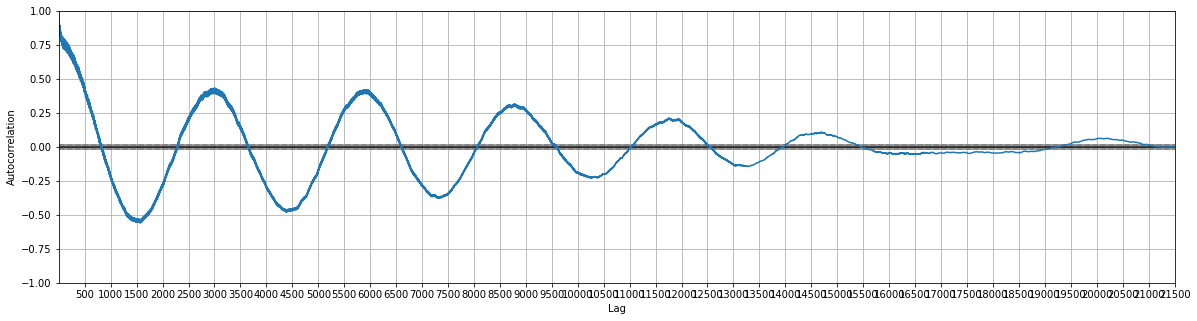

In [ ]:
#Визуализация корреляции параметра с самим собой помогает определить сезонноять изменения параметра
#Автокореляция - корреляуия относителино себя со  сдвигом на лаг  corr(x,x=lag)
condition=data['T'].notna()
data2=data[condition]
plt.figure(figsize=[20,5])
pd.plotting.autocorrelation_plot(data2['T'])
plt.locator_params(axis='x',nbins=50)

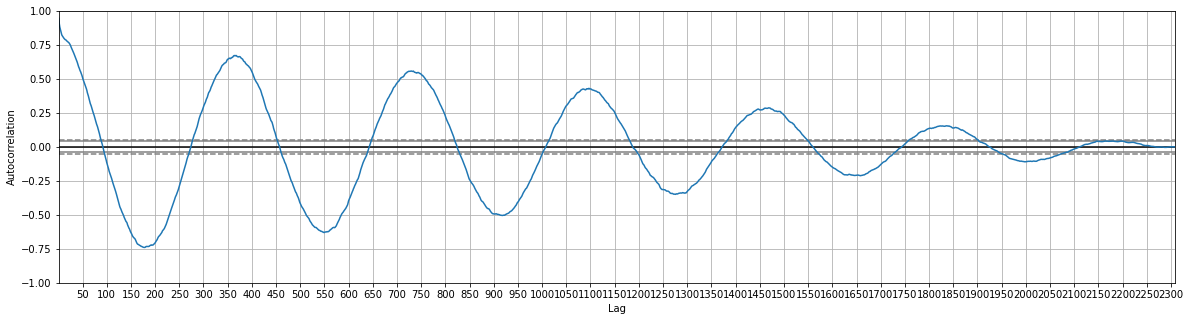

In [ ]:
#Интервал автокореляции 3000 потому что ежедневно делается 3 замера температуры
#Отфильтруем даные оставивзаписи сделанные в полдень
data_delly=data2[data2['date'].dt.hour==12]
plt.figure(figsize=[20,5])
pd.plotting.autocorrelation_plot(data_delly['T'])
plt.locator_params(axis='x',nbins=50)


In [ ]:
from sklearn.linear_model import LinearRegression
#Разобьем dataset на обучающую и тестовую выборку
data_trein=data2[data['date'].dt.year<2020]
data_test=data2[data['date'].dt.year>=2020]
X_trein=pd.DataFrame(data_trein.index)
y_trein=data_trein['T']
X_test=pd.DataFrame(data_test.index)
y_test=data_test['T']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


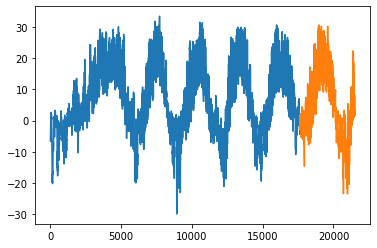

In [ ]:
plt.plot(X_trein[0],y_trein)
plt.plot(X_test[0],y_test)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_trein,y_trein)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
trend_history=model.predict(X_trein)

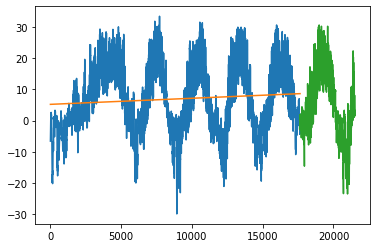

In [ ]:
plt.plot(X_trein[0],y_trein)
plt.plot(X_trein[0],trend_history)
plt.plot(X_test[0],y_test)


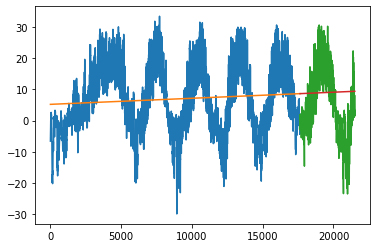

In [ ]:
#спрогнозируем данные в будующее
trend_future=model.predict(X_test)
plt.plot(X_trein[0],y_trein)
plt.plot(X_trein[0],trend_history)
plt.plot(X_test[0],y_test)
plt.plot(X_test[0],trend_future)

In [ ]:
trend_history


array([5.18692439, 5.18711881, 5.18731323, ..., 8.61570282, 8.61589724,
       8.61609166])

In [ ]:
trend_future

array([8.61628607, 8.61648049, 8.61667491, ..., 9.36752217, 9.36771659,
       9.36791101])

In [ ]:
#Насколько температура выросла за 5 лет
a=trend_history[0]
b=trend_history[-1]
a,b

(5.186924388327812, 8.616091655665613)

In [ ]:
(b-a)/a #процент прироста

0.661117650963737